In [2]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def setr3(side,ws1,ws2,ws3):
    count=0
    if(ws1==side):
        count=count+1
    if(ws2==side):
        count=count+1
    if(ws3==side):
        count=count+1
    return count

def seteco(side,t2,st2,t3,st3):
    count=0
    if(t2=='Eco'):
        if (st2!=side):
            count=count+1
    if(t3=='Eco'):
        if (st3!=side):
            count=count+1
    return count
def setwr(side,data,half):#half 1=false 16=true
    countT=0.0
    countCT=0.0
    if (half==False):
        for i in data[data.index<=15].index:
            if(data[data.index==i].WS[i]=='T'):
                countT=countT+1
            else:countCT=countCT+1
    else:
        for i in data[data.index>15].index:
            if(data[data.index==i].WS[i]=='T'):
                countT=countT+1
            else:countCT=countCT+1
    if(side=='T'):
        return countT/(countCT+countT)
    else:
        return countCT/(countCT+countT)

def setfw(side,data):#开场时的 side 有没有赢得最终胜利
    countT=0.0
    countCT=0.0
    for i in data[data.index<=15].index:
        if(data[data.index==i].WS[i]=='T'):
            countT=countT+1
        else:countCT=countCT+1

    for i in data[data.index>15].index:
        if(data[data.index==i].WS[i]=='T'):
            countCT=countCT+1
        else:countT=countT+1
    if(countT>countCT):
        win='T'
    if(countT<countCT):
        win='CT'
    if(countT==countCT):
        win='DRAW'
    if(side==win):
        return True
    else: return False

    


from pandas import DataFrame
Tdata=DataFrame(columns=['MN','R3','ECO','WR','FW','Half'])#（比賽名字 半場前三局得分 對方eco次數 半場勝率 最終是否獲勝比賽 是否下半場） ）
Tindex=1
CTdata=DataFrame(columns=['MN','R3','ECO','WR','FW','Half'])
CTindex=1


Tdata1=DataFrame(columns=['MN','R3','ECO','WR','FW','Half'])
Tindex1=1
CTdata1=DataFrame(columns=['MN','R3','ECO','WR','FW','Half'])
CTindex1=1





In [3]:
files = [['inf_ after_Cloud9VsAstralis','inf_ after_fazeVsNinja','inf_ after_natusVsAstralis','mir_after_FazeClanVsmibr-','mir_after_mibr-VsCloud9','mir_after_mibr-VsNatus','mir_after_NinjaVsmibr-'],['inf_before_cloud9VsWin','inf_before_FaZeVsAstralis','inf_before_fnaVsWin','inf_before_mibrVsComplex','mir_before_AstralisVsFaze','mir_before_FnaVsHellfire','mir_before_hellVsLiquid','mir_before_mouseVsFaze','mir_before_NatusVsFna','mir_before_NinjasVsLiquid']]

for j in range(7):
    file=files[0][j]
    print(file)
    data = pd.read_csv(file+'.csv', index_col=0)
    if (data[data.index==1].WS[1]=='T'):
        Tdata.loc[Tindex] = [file,setr3('T',data[data.index==1].WS[1],data[data.index==2].WS[2],data[data.index==3].WS[3]),seteco('T',data[data.index==2].TYPE[2],data[data.index==2].ST[2],data[data.index==3].TYPE[3],data[data.index==3].ST[3]),setwr('T',data,False),setfw('T',data),False]
        print(1)
        Tindex=Tindex+1
    if (data[data.index==1].WS[1]=='CT'):
        CTdata.loc[CTindex] = [file,setr3('CT',data[data.index==1].WS[1],data[data.index==2].WS[2],data[data.index==3].WS[3]),seteco('CT',data[data.index==2].TYPE[2],data[data.index==2].ST[2],data[data.index==3].TYPE[3],data[data.index==3].ST[3]),setwr('CT',data,False),setfw('CT',data),False]
        CTindex=CTindex+1
        print(2)
    if (data[data.index==16].WS[16]=='T'):
        Tdata.loc[Tindex] = [file,setr3('T',data[data.index==16].WS[16],data[data.index==17].WS[17],data[data.index==18].WS[18]),seteco('T',data[data.index==17].TYPE[17],data[data.index==17].ST[17],data[data.index==18].TYPE[18],data[data.index==18].ST[18]),setwr('T',data,True),setfw('T',data),True]
        Tindex=Tindex+1
        print(3)
    if (data[data.index==16].WS[16]=='CT'):
        CTdata.loc[CTindex] = [file,setr3('CT',data[data.index==16].WS[16],data[data.index==17].WS[17],data[data.index==18].WS[18]),seteco('CT',data[data.index==17].TYPE[17],data[data.index==17].ST[17],data[data.index==18].TYPE[18],data[data.index==18].ST[18]),setwr('CT',data,True),setfw('CT',data),True]
        CTindex=CTindex+1
        print(4)

inf_ after_Cloud9VsAstralis
2
3
inf_ after_fazeVsNinja
2
3
inf_ after_natusVsAstralis
1
4
mir_after_FazeClanVsmibr-
2
3
mir_after_mibr-VsCloud9
2
3
mir_after_mibr-VsNatus
1
4
mir_after_NinjaVsmibr-
1
4


In [4]:
print(Tdata)


                            MN R3 ECO        WR     FW   Half
1  inf_ after_Cloud9VsAstralis  3   1  0.533333   True   True
2       inf_ after_fazeVsNinja  3   1  0.333333  False   True
3   inf_ after_natusVsAstralis  3   1  0.666667   True  False
4    mir_after_FazeClanVsmibr-  2   1  0.466667  False   True
5      mir_after_mibr-VsCloud9  3   1  0.333333   True   True
6       mir_after_mibr-VsNatus  3   1  0.866667   True  False
7       mir_after_NinjaVsmibr-  3   1  0.733333   True  False


In [5]:
print(CTdata)


                            MN R3 ECO        WR     FW   Half
1  inf_ after_Cloud9VsAstralis  3   1  0.400000  False  False
2       inf_ after_fazeVsNinja  1   1  0.666667  False  False
3   inf_ after_natusVsAstralis  1   0  0.600000  False   True
4    mir_after_FazeClanVsmibr-  3   1  0.533333  False  False
5      mir_after_mibr-VsCloud9  2   1  0.600000  False  False
6       mir_after_mibr-VsNatus  3   0  1.000000  False   True
7       mir_after_NinjaVsmibr-  1   0  0.714286  False   True


In [6]:
files = [['inf_ after_Cloud9VsAstralis','inf_ after_fazeVsNinja','inf_ after_natusVsAstralis','mir_after_FazeClanVsmibr-','mir_after_mibr-VsCloud9','mir_after_mibr-VsNatus','mir_after_NinjaVsmibr-'],['inf_before_cloud9VsWin','inf_before_FaZeVsAstralis','inf_before_fnaVsWin','inf_before_mibrVsComplex','mir_before_AstralisVsFaze','mir_before_FnaVsHellfire','mir_before_hellVsLiquid','mir_before_mouseVsFaze','mir_before_NatusVsFna','mir_before_NinjasVsLiquid']]

for j in range(10):
    file=files[1][j]
    print(file)
    data = pd.read_csv(file+'.csv', index_col=0)
    if (data[data.index==1].WS[1]=='T'):
        Tdata1.loc[Tindex1] = [file,setr3('T',data[data.index==1].WS[1],data[data.index==2].WS[2],data[data.index==3].WS[3]),seteco('T',data[data.index==2].TYPE[2],data[data.index==2].ST[2],data[data.index==3].TYPE[3],data[data.index==3].ST[3]),setwr('T',data,False),setfw('T',data),False]
        print(1)
        Tindex1=Tindex1+1
    if (data[data.index==1].WS[1]=='CT'):
        CTdata1.loc[CTindex1] = [file,setr3('CT',data[data.index==1].WS[1],data[data.index==2].WS[2],data[data.index==3].WS[3]),seteco('CT',data[data.index==2].TYPE[2],data[data.index==2].ST[2],data[data.index==3].TYPE[3],data[data.index==3].ST[3]),setwr('CT',data,False),setfw('CT',data),False]
        CTindex1=CTindex1+1
        print(2)
    if (data[data.index==16].WS[16]=='T'):
        Tdata1.loc[Tindex1] = [file,setr3('T',data[data.index==16].WS[16],data[data.index==17].WS[17],data[data.index==18].WS[18]),seteco('T',data[data.index==17].TYPE[17],data[data.index==17].ST[17],data[data.index==18].TYPE[18],data[data.index==18].ST[18]),setwr('T',data,True),setfw('T',data),True]
        Tindex1=Tindex1+1
        print(3)
    if (data[data.index==16].WS[16]=='CT'):
        CTdata1.loc[CTindex1] = [file,setr3('CT',data[data.index==16].WS[16],data[data.index==17].WS[17],data[data.index==18].WS[18]),seteco('CT',data[data.index==17].TYPE[17],data[data.index==17].ST[17],data[data.index==18].TYPE[18],data[data.index==18].ST[18]),setwr('CT',data,True),setfw('CT',data),True]
        CTindex1=CTindex1+1
        print(4)

inf_before_cloud9VsWin
2
3
inf_before_FaZeVsAstralis
2
4
inf_before_fnaVsWin
2
3
inf_before_mibrVsComplex
2
3
mir_before_AstralisVsFaze
1
3
mir_before_FnaVsHellfire
1
3
mir_before_hellVsLiquid
1
3
mir_before_mouseVsFaze
2
4
mir_before_NatusVsFna
1
3
mir_before_NinjasVsLiquid
1
4


In [7]:
print(Tdata1)


                           MN R3 ECO        WR     FW   Half
1      inf_before_cloud9VsWin  1   0  0.350000  False   True
2         inf_before_fnaVsWin  3   1  1.000000  False   True
3    inf_before_mibrVsComplex  1   1  0.692308  False   True
4   mir_before_AstralisVsFaze  3   2  0.266667  False  False
5   mir_before_AstralisVsFaze  1   0  0.333333  False   True
6    mir_before_FnaVsHellfire  3   2  0.733333  False  False
7    mir_before_FnaVsHellfire  1   1  0.666667  False   True
8     mir_before_hellVsLiquid  3   2  0.800000   True  False
9     mir_before_hellVsLiquid  3   2  0.636364   True   True
10      mir_before_NatusVsFna  2   1  0.466667  False  False
11      mir_before_NatusVsFna  3   2  0.800000  False   True
12  mir_before_NinjasVsLiquid  3   1  0.466667   True  False


In [8]:
print(CTdata1)

                          MN R3 ECO        WR     FW   Half
1     inf_before_cloud9VsWin  2   1  0.800000   True  False
2  inf_before_FaZeVsAstralis  2   1  0.666667  False  False
3  inf_before_FaZeVsAstralis  3   1  0.846154  False   True
4        inf_before_fnaVsWin  3   1  0.533333   True  False
5   inf_before_mibrVsComplex  3   2  0.466667   True  False
6     mir_before_mouseVsFaze  3   2  0.333333  False  False
7     mir_before_mouseVsFaze  1   0  0.666667  False   True
8  mir_before_NinjasVsLiquid  2   1  0.818182  False   True


For T wining the pistol round
Before: average win in 3 rounds:  2.25
After: average win in 3 rounds:  2.857142857142857
Before: average CT ECO in 3 rounds:  1.25
After: average CT ECO in 3 rounds:  1.0
Before: average wining rate in the half:  0.6010003885003885
After: average wining rate in the half:  0.5619047619047619


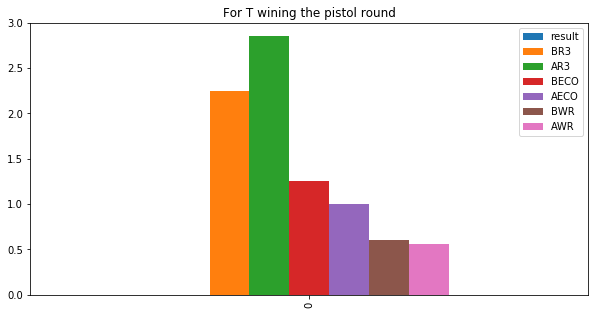

In [23]:
Twindata=DataFrame(columns=['result'])

Twindata['BR3']=[Tdata1.R3.mean()]
Twindata['AR3']=[Tdata.R3.mean()]
Twindata['BECO']=[Tdata1.ECO.mean()]
Twindata['AECO']=[Tdata.ECO.mean()]
Twindata['BWR']=[Tdata1.WR.mean()]
Twindata['AWR']=[Tdata.WR.mean()]

Twindata.plot(kind='bar', figsize=[10,5],  legend=True, title='For T wining the pistol round')
print('For T wining the pistol round')

print('Before: average win in 3 rounds: ',Tdata1.R3.mean())
print('After: average win in 3 rounds: ',Tdata.R3.mean())

print('Before: average CT ECO in 3 rounds: ',Tdata1.ECO.mean())
print('After: average CT ECO in 3 rounds: ',Tdata.ECO.mean())

print('Before: average wining rate in the half: ',Tdata1.WR.mean())
print('After: average wining rate in the half: ',Tdata.WR.mean())

For CT wining the pistol round
Before: average win in 3 rounds:  2.375
After: average win in 3 rounds:  2.0
Before: average T ECO in 3 rounds:  1.125
After: average T ECO in 3 rounds:  0.5714285714285714
Before: average wining rate in the half:  0.6413752913752915
After: average wining rate in the half:  0.6448979591836734


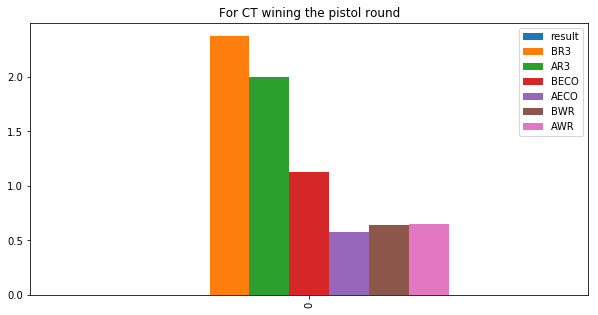

In [25]:
CTwindata=DataFrame(columns=['result'])

CTwindata['BR3']=[CTdata1.R3.mean()]
CTwindata['AR3']=[CTdata.R3.mean()]
CTwindata['BECO']=[CTdata1.ECO.mean()]
CTwindata['AECO']=[CTdata.ECO.mean()]
CTwindata['BWR']=[CTdata1.WR.mean()]
CTwindata['AWR']=[CTdata.WR.mean()]

CTwindata.plot(kind='bar', figsize=[10,5],  legend=True, title='For CT wining the pistol round')
print('For CT wining the pistol round')

print('Before: average win in 3 rounds: ',CTdata1.R3.mean())
print('After: average win in 3 rounds: ',CTdata.R3.mean())

print('Before: average T ECO in 3 rounds: ',CTdata1.ECO.mean())
print('After: average T ECO in 3 rounds: ',CTdata.ECO.mean())

print('Before: average wining rate in the half: ',CTdata1.WR.mean())
print('After: average wining rate in the half: ',CTdata.WR.mean())